In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# data = pickle.load(open("final_dataset1.pkl", "rb"))

data = pd.read_csv("gender.csv")




In [8]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [7]:
import numpy as np

# 주어진 데이터와 PC1 방향 벡터
data_point = np.array([3, 3, 9])
pc1_direction = np.array([2, 1, 2])

# PC1 방향으로의 사영 계산
projection = np.dot(data_point, pc1_direction) / np.dot(pc1_direction, pc1_direction) * pc1_direction
ans = data_point - projection

print(projection)
print(ans)


[6. 3. 6.]
[-3.  0.  3.]


In [12]:
np.array(data)

array([[1, 11.8, 6.1, ..., 1, 1, 'Male'],
       [0, 14.0, 5.4, ..., 1, 0, 'Female'],
       [0, 11.8, 6.3, ..., 1, 1, 'Male'],
       ...,
       [1, 12.9, 5.7, ..., 0, 0, 'Female'],
       [1, 13.2, 6.2, ..., 0, 0, 'Female'],
       [1, 15.4, 5.4, ..., 1, 1, 'Male']], dtype=object)

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array(data)
pca = PCA(n_components=4)
Y = pca.fit_transform(X) # fit 한 다음에 새로운 축에 데이터를 반영하는 함수

plt.scatter(Y[:,0], Y[:,1], c=data.gender, alpha=0.3)
plt.show()

plt.plot(pca.explained_variance_, "-o")
plt.show()




ValueError: could not convert string to float: 'Male'

In [ ]:
X = [[1,2],
        [2,1],
        [3,3],
        [4,5],
        [5,4]]



In [15]:
#pca 3-3




def calculate_cov_matrix():
    data = [[1,2],
        [2,1],
        [3,3],
        [4,5],
        [5,4]]
    nData = len(data)

    x = np.array(data)
    x_mean = x
    x_mean[:, 0] = x[:, 0] - np.mean(x[:, 0])
    x_mean[:, 1] = x[:, 1] - np.mean(x[:, 1])

    print('mean adjust of data')
    print(x_mean)

    res = x_mean.T @ x_mean / nData

    print('\n')
    print('covariance matrix(from definition):')
    print(res)

    c = np.cov(x.T, bias=True)
    print('\n')
    print('covariance matrix(python function):')
    print(c)

if __name__ == '__main__':
    calculate_cov_matrix()

mean adjust of data
[[-2 -1]
 [-1 -2]
 [ 0  0]
 [ 1  2]
 [ 2  1]]


covariance matrix(from definition):
[[2.  1.6]
 [1.6 2. ]]


covariance matrix(python function):
[[2.  1.6]
 [1.6 2. ]]


In [108]:
A = np.array([[1,2],
        [2,1],
        [3,3],
        [4,5],
        [5,4]])

X = A
X = X - X.mean(axis=0) # 점들의 분포가 원점에 가깝게 오도록

# covariance matrix
C = (X.T @ X) / X.shape[0]
print(C)

[[2.  1.6]
 [1.6 2. ]]


k means

In [114]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

data = np.array([(1,1), (2,1), (1,2), (4,3), (4,4)])
data = pca.fit_transform(data)

kmeans = KMeans(n_clusters=2) # n_clusters == k값
kmeans.fit(data)

cluster = kmeans.predict(data)

cluster

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 0, 0])

In [115]:
center = kmeans.cluster_centers_
center

array([[ 2.06137444, -0.02711865],
       [-1.37424963,  0.0180791 ]])

In [54]:
X = {(1,1), (2,1), (1,2), (4,3), (4,4)}

# points1 = [[3,1]]
# points2 = [[3, 2]]
# points = np.concatenate( (points1, points2) )
# print(points)

# points = np.array(X)

points1 = [[1,1]]
points2 = [[2,1]]
points3 = [[1,2]]
points4 = [[4,3]]
points5 = [[4,4]]

points = np.concatenate( (points1, points2, points3, points4, points5) )



In [55]:
def assign(point, centroids, k):
    return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))



def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k
    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]


def kmeans(k, points):
    prev_assignment = []
    # 1. 임의로 k개의 점을 중심점으로 선택 (forgy)
    centroids = points[np.random.choice(points.shape[0], size=k)]
    for epoch in range(10):
    # 2. 각 점이 할당될 중심점을 계산
        assignments = [assign(p, centroids, k) for p in points]
        print(epoch, assignments)
        # 3. 새로운 centroid 계산
        centroids = compute_centroids(assignments, points, k)
        print(epoch, centroids)
        # 4. 클러스터에 변화가 없을 경우 종료
        if prev_assignment == assignments:
            break
        prev_assignment = assignments
    return assignments, centroids


In [47]:
def kmeans(k, points):
    prev_assignments = []
    # 1. random centroid 추출
    centroids = points[np.random.choice(len(points), size=k)] # points들 중 k개를 뽑는 것, 주어진 범위에서 몇개를 골라낸다
    
    for epoch in range(10):
        # 2. 각 point가 어떤 centroid랑 가장 가까운지 계산(즉, 어느 클러스터에 속하는지 계산)
        # ex) assignments = [1, 3, 2, 2, 4, 3, 1, 4, 3, 6]
        assignments = []
        for p in points:
            min_dist = 9e9 # 굉장히 큰 값, 9곱하기 10의 9승
            min_cid = -1 # 몇번째 centroid랑 가장 가까운지
            for cid, c in enumerate(centroids):
                dist = ((c - p) ** 2).sum() # 루트 안 씌웠음
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
                    
            assignments.append(min_cid)
            
        # 3. assignmen를 기준으로 새로운 centroid를 계산하기
        centroids = np.array([points[np.array(assignments) == cid].mean(axis=0) for cid, c in enumerate(centroids)])
            
        # 예시
        # assignments = [1, 3, 2, 2, 4, 3, 1, 4, 3, 6]
        # enumerate(assignments)    => [(0, 1),(1,3),(2,2),(3,2)(4,4),(5,3),(6,1),(7,4),(8,3),(9,6)]
        
        # assignments = 1    => [True, Fasle, False, False, False, False, True, False, False, False] # 1만 True로
        # points[assignments == 1] = [[2,3,4], [4,5,6]]
        
        # 4. 변경이 발생했는지 확인
        if prev_assignments == assignments:
            break
        prev_assignments = assignments
        
    return assignments, centroids
            

In [56]:
assignments, centroids = kmeans(8, points)

print(assignments)
print(centroids)

0 [2, 0, 7, 1, 4]
0 [array([2., 1.]), array([4., 3.]), array([1., 1.]), array([1, 2]), array([4., 4.]), array([2, 1]), array([4, 3]), array([1., 2.])]
1 [2, 0, 3, 1, 4]
1 [array([2., 1.]), array([4., 3.]), array([1., 1.]), array([1., 2.]), array([4., 4.]), array([1, 2]), array([4, 4]), array([4, 4])]
2 [2, 0, 3, 1, 4]
2 [array([2., 1.]), array([4., 3.]), array([1., 1.]), array([1., 2.]), array([4., 4.]), array([4, 3]), array([4, 3]), array([1, 1])]
[2, 0, 3, 1, 4]
[array([2., 1.]), array([4., 3.]), array([1., 1.]), array([1., 2.]), array([4., 4.]), array([4, 3]), array([4, 3]), array([1, 1])]


In [57]:
# item-item

def cos(a, b):
       #return np.dot(A, B)/(np.norm(A)*np.norm(B))
       return (a*b).sum() / ((a**2).sum() ** 0.5) / ((b**2).sum() ** 0.5)

def pearson(a, b):
    #return np.dot((a - np.mean(a)), (b - np.mean(b))) / ((np.linalg.norm(a - np.mean(a))) * (np.linalg.norm(b - np.mean(b))))
    a = a - a.mean()
    b = b - b.mean()
    return cos(a, b)



In [59]:
# user-user

A = np.array([
    [2,3,5,1,5],
    [5,3,1,4,13/4],
    [3,13/4,4,1,5], 
    [2,1,9/4,1,5],
    [5,2,2,3,3],
])

for i in range(5):
    print(pearson(A[i], A[2]))
    
ans = (0.9212884029599915 * 3 + 0.7926416156731931 * 1) / (0.9212884029599915 + 0.7926416156731931)
print()
print(ans)


0.9212884029599915
-0.4357142857142857
1.0
0.7926416156731931
-0.17251638983558856

2.0750595332879405


In [85]:
import torch
import torch.nn as nn

items = torch.LongTensor([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])
users = torch.LongTensor([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4])
ratings = torch.FloatTensor([2,5,3,2,5,
                             3,3,13/4,1,2,
                             5,1,4,9/4,2,
                             1,4,1,1,3,
                             5,13/4,5,5,3])
print(len(items))

25


In [99]:
rank = 1
lambda1 = 0.01 # 가중치
lambda2 = 0.01


numItems = items.max() + 1
numUsers = users.max() + 1

mean = ratings.mean()
#mean = (ratings.sum() / len(ratings)).item()

P = torch.randn(numItems, rank, requires_grad=True) # gradient 방법으로 update
Q = torch.randn(numUsers, rank, requires_grad=True)
# P = items
# Q = users
print(P)


tensor([[-1.2701],
        [-0.8305],
        [-1.4953],
        [ 1.1253],
        [ 1.1522]], requires_grad=True)


epoch: 0, cost: 13.068894
epoch: 100, cost: 1.314519
epoch: 200, cost: 1.313836
epoch: 300, cost: 1.313840
epoch: 400, cost: 1.313842
epoch: 500, cost: 1.313844
epoch: 600, cost: 1.313845
epoch: 700, cost: 1.313845
epoch: 800, cost: 1.313845
epoch: 900, cost: 1.313845
epoch: 1000, cost: 1.313845


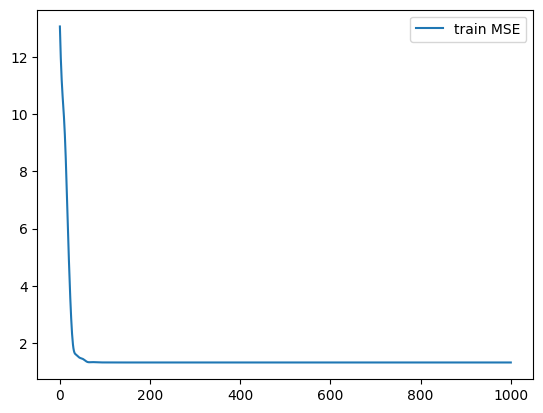

In [100]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
    h = torch. sum(P[items] * Q[users], dim=1)     
    # h = (P[items] * Q[users]).sum(dim=1)
    cost = mse(h, ratings)
    cost_reg = cost + lambda1 * (P ** 2).mean() + lambda2 * (Q ** 2).mean()
    
    optimizer.zero_grad()
    #cost.backward()
    cost_reg.backward()
    optimizer.step()
    
    with torch.no_grad():
        X.append(epoch)
        Y.append(cost.item())        
        #h_test = (P[items_test] * Q[users_test]).sum(dim=1)
        #cost_test = mse(h_test, ratings_test)
        
        #Y_test.append(cost_test.item())
        
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))
            
plt.plot(X, Y, label="train MSE")
#plt.plot(X, Y_test, label="test MSE")
plt.legend() # 이름이 찍힘
plt.show()


# regularization 으로 overfitting이 조금 해결됐다. cost로 했을 때와, cost_reg로 했을 때 비교해보면 그래프가 올라가지 않음.

In [101]:
print(P)

# -1.9254,-1.4287,-1.6504,-1.1281,-2.3960

tensor([[1.9264],
        [1.4295],
        [1.6512],
        [1.1287],
        [2.3973]], requires_grad=True)
